## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman2Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 0.01


## Dataset - California Dataset


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman2Dataset.friedman2_data(n_samples)

          X1           X2        X3         X4            Y
0  86.853919   842.515647  0.777850   9.437451   660.977697
1  90.493350  1521.021203  0.172377   3.497254   277.471690
2  63.216322  1619.981008  0.687948  10.973845  1116.269065
3  99.829069   936.896458  0.834337   8.217239   788.158733
4  91.257624  1563.362429  0.932221   4.108879  1460.242781


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 1.0275449	total: 57.5ms	remaining: 57.4s
1:	learn: 1.0155037	total: 58ms	remaining: 29s
2:	learn: 1.0041934	total: 59.2ms	remaining: 19.7s
3:	learn: 0.9930625	total: 59.7ms	remaining: 14.9s
4:	learn: 0.9787811	total: 60.3ms	remaining: 12s
5:	learn: 0.9673471	total: 60.9ms	remaining: 10.1s
6:	learn: 0.9531360	total: 61.7ms	remaining: 8.75s
7:	learn: 0.9394696	total: 62.2ms	remaining: 7.71s
8:	learn: 0.9267605	total: 62.7ms	remaining: 6.91s
9:	learn: 0.9134640	total: 63.4ms	remaining: 6.28s
10:	learn: 0.9020577	total: 63.8ms	remaining: 5.74s
11:	learn: 0.8870200	total: 64.4ms	remaining: 5.3s
12:	learn: 0.8752273	total: 65ms	remaining: 4.93s
13:	learn: 0.8617369	total: 65.4ms	remaining: 4.61s
14:	learn: 0.8510024	total: 65.8ms	remaining: 4.32s
15:	learn: 0.8399426	total: 66.3ms	remaining: 4.07s
16:	learn: 0.8281652	total: 66.8ms	remaining: 3.86s
17:	learn: 0.8166304	total: 67.1ms	remaining: 3.66s
18:	learn: 0.8074375	total: 67.6ms	remaining: 3.49s
1

114:	learn: 0.2547212	total: 108ms	remaining: 830ms
115:	learn: 0.2522836	total: 108ms	remaining: 827ms
116:	learn: 0.2497218	total: 109ms	remaining: 823ms
117:	learn: 0.2474721	total: 110ms	remaining: 819ms
118:	learn: 0.2446583	total: 110ms	remaining: 816ms
119:	learn: 0.2423223	total: 111ms	remaining: 812ms
120:	learn: 0.2389420	total: 111ms	remaining: 808ms
121:	learn: 0.2368694	total: 112ms	remaining: 804ms
122:	learn: 0.2337983	total: 112ms	remaining: 800ms
123:	learn: 0.2317134	total: 113ms	remaining: 797ms
124:	learn: 0.2285649	total: 113ms	remaining: 793ms
125:	learn: 0.2254061	total: 114ms	remaining: 788ms
126:	learn: 0.2229132	total: 114ms	remaining: 785ms
127:	learn: 0.2202488	total: 115ms	remaining: 780ms
128:	learn: 0.2184884	total: 115ms	remaining: 777ms
129:	learn: 0.2163933	total: 116ms	remaining: 774ms
130:	learn: 0.2147715	total: 116ms	remaining: 771ms
131:	learn: 0.2130242	total: 117ms	remaining: 768ms
132:	learn: 0.2108849	total: 117ms	remaining: 764ms
133:	learn: 

272:	learn: 0.0678867	total: 184ms	remaining: 490ms
273:	learn: 0.0674281	total: 184ms	remaining: 489ms
274:	learn: 0.0669571	total: 185ms	remaining: 487ms
275:	learn: 0.0667427	total: 186ms	remaining: 487ms
276:	learn: 0.0662655	total: 186ms	remaining: 485ms
277:	learn: 0.0660577	total: 186ms	remaining: 484ms
278:	learn: 0.0657336	total: 187ms	remaining: 482ms
279:	learn: 0.0652822	total: 187ms	remaining: 481ms
280:	learn: 0.0648721	total: 188ms	remaining: 480ms
281:	learn: 0.0644148	total: 188ms	remaining: 479ms
282:	learn: 0.0639679	total: 189ms	remaining: 478ms
283:	learn: 0.0635564	total: 189ms	remaining: 476ms
284:	learn: 0.0633543	total: 189ms	remaining: 475ms
285:	learn: 0.0629342	total: 190ms	remaining: 474ms
286:	learn: 0.0625426	total: 190ms	remaining: 473ms
287:	learn: 0.0622295	total: 191ms	remaining: 471ms
288:	learn: 0.0618296	total: 191ms	remaining: 470ms
289:	learn: 0.0614752	total: 191ms	remaining: 469ms
290:	learn: 0.0612525	total: 192ms	remaining: 467ms
291:	learn: 

505:	learn: 0.0277449	total: 286ms	remaining: 279ms
506:	learn: 0.0276073	total: 287ms	remaining: 279ms
507:	learn: 0.0275596	total: 288ms	remaining: 279ms
508:	learn: 0.0275128	total: 288ms	remaining: 278ms
509:	learn: 0.0273777	total: 288ms	remaining: 277ms
510:	learn: 0.0273318	total: 289ms	remaining: 277ms
511:	learn: 0.0271851	total: 289ms	remaining: 276ms
512:	learn: 0.0271561	total: 290ms	remaining: 275ms
513:	learn: 0.0270257	total: 290ms	remaining: 275ms
514:	learn: 0.0269972	total: 291ms	remaining: 274ms
515:	learn: 0.0268688	total: 291ms	remaining: 273ms
516:	learn: 0.0268408	total: 292ms	remaining: 273ms
517:	learn: 0.0266728	total: 292ms	remaining: 272ms
518:	learn: 0.0265126	total: 293ms	remaining: 271ms
519:	learn: 0.0264851	total: 293ms	remaining: 271ms
520:	learn: 0.0263335	total: 294ms	remaining: 270ms
521:	learn: 0.0262118	total: 294ms	remaining: 269ms
522:	learn: 0.0261829	total: 295ms	remaining: 269ms
523:	learn: 0.0260291	total: 295ms	remaining: 268ms
524:	learn: 

671:	learn: 0.0157461	total: 362ms	remaining: 176ms
672:	learn: 0.0157361	total: 362ms	remaining: 176ms
673:	learn: 0.0157262	total: 363ms	remaining: 175ms
674:	learn: 0.0156581	total: 363ms	remaining: 175ms
675:	learn: 0.0156134	total: 363ms	remaining: 174ms
676:	learn: 0.0155615	total: 364ms	remaining: 174ms
677:	learn: 0.0155114	total: 364ms	remaining: 173ms
678:	learn: 0.0155015	total: 365ms	remaining: 173ms
679:	learn: 0.0154272	total: 365ms	remaining: 172ms
680:	learn: 0.0153504	total: 366ms	remaining: 171ms
681:	learn: 0.0152853	total: 366ms	remaining: 171ms
682:	learn: 0.0152662	total: 367ms	remaining: 170ms
683:	learn: 0.0152181	total: 367ms	remaining: 170ms
684:	learn: 0.0151863	total: 367ms	remaining: 169ms
685:	learn: 0.0151677	total: 368ms	remaining: 168ms
686:	learn: 0.0150954	total: 368ms	remaining: 168ms
687:	learn: 0.0150642	total: 369ms	remaining: 167ms
688:	learn: 0.0150210	total: 369ms	remaining: 167ms
689:	learn: 0.0150030	total: 370ms	remaining: 166ms
690:	learn: 

883:	learn: 0.0081299	total: 463ms	remaining: 60.8ms
884:	learn: 0.0080952	total: 464ms	remaining: 60.2ms
885:	learn: 0.0080793	total: 464ms	remaining: 59.7ms
886:	learn: 0.0080511	total: 464ms	remaining: 59.2ms
887:	learn: 0.0080468	total: 465ms	remaining: 58.6ms
888:	learn: 0.0080425	total: 465ms	remaining: 58.1ms
889:	learn: 0.0080175	total: 466ms	remaining: 57.6ms
890:	learn: 0.0079836	total: 467ms	remaining: 57.1ms
891:	learn: 0.0079682	total: 467ms	remaining: 56.6ms
892:	learn: 0.0079440	total: 468ms	remaining: 56ms
893:	learn: 0.0079216	total: 468ms	remaining: 55.5ms
894:	learn: 0.0079052	total: 469ms	remaining: 55ms
895:	learn: 0.0078804	total: 469ms	remaining: 54.5ms
896:	learn: 0.0078587	total: 470ms	remaining: 53.9ms
897:	learn: 0.0078363	total: 470ms	remaining: 53.4ms
898:	learn: 0.0078203	total: 471ms	remaining: 52.9ms
899:	learn: 0.0077967	total: 471ms	remaining: 52.3ms
900:	learn: 0.0077727	total: 471ms	remaining: 51.8ms
901:	learn: 0.0077527	total: 472ms	remaining: 51.3

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape)
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)

mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC - GAN Model with skip connection

In [11]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


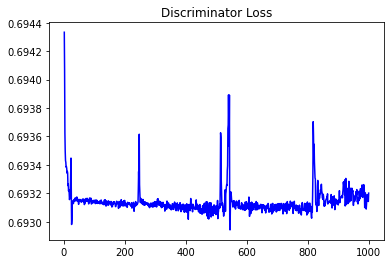

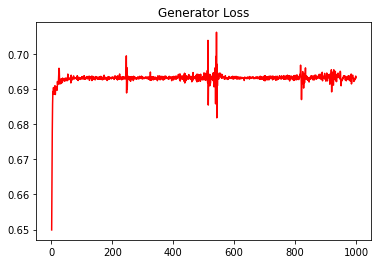

In [12]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)

In [13]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.02441099505178103


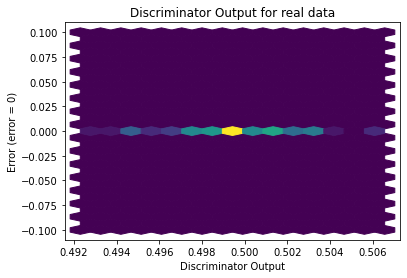

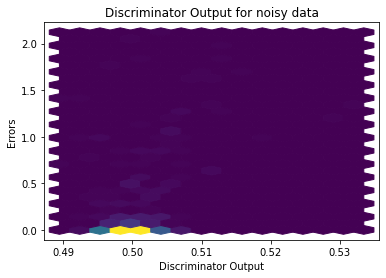

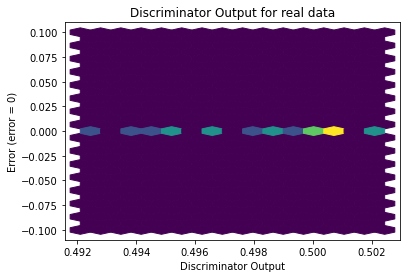

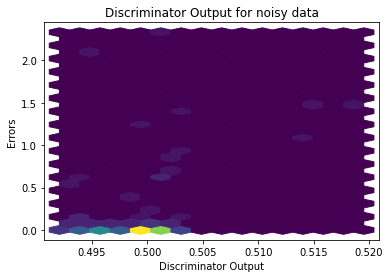

In [14]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [15]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.0120]], requires_grad=True)
